# COMP9417 19T3  Homework 2: Applying and Implementing Machine Learning

# Question 1

## Question 1 – Learning curve 

The number of data instances required to effectively learn the target function depends on dataset characteristics and the learning algorithm. In this question, you will interpret results of learning three different datasets by two machine learning algorithms trained on varying size of data, from 5% to 90% of the dataset. After training on a fraction of the dataset, the model is tested using the rest of the dataset. For example, if 40% of data is used for training, the remaining 60% of the dataset is used for testing the trained model.
The datasets are from different, real-world  domains, and vary in size from a few hundred to a couple of thousand instances. For a smoother learning curve, the training is done in a cross validation fashion.


### Running the classifiers

**1(a). [0.5 mark]** 

Run the code section in the notebook cells below. This will generate a table of results, which you should copy and paste **WITHOUT MODIFICATION** into you report as your answer for "Question 1(a)". 

The output of the code section is a table, which represents the percentage accuracy of classification for the decision tree algorithm. Each of the columns shows accuracy for a model trained on a different fraction of the dataset.

### Result interpretation
Answer these questions in your report file.  Your answers must be based on the results table you saved in "Question 1(a)".

**1(b). [0.5 mark]** Refer to Homework2.pdf file.

**1(c). [0.5 mark]** Refer to Homework2.pdf file.

In [1]:
# Code for question 1

import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.base import TransformerMixin
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import sys
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
# fixed random seed
np.random.seed(1)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def label_enc(labels):
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    return le

In [3]:
def load_data(path):
    dataset = arff.loadarff(path)
    data = pd.DataFrame(dataset[0])
    attr = np.array(data.columns)
    data = DataFrameImputer().fit_transform(data).values

    # mask categorical features
    masks = []
    for i in range(len(attr)-1):
        if isinstance(attr[i][1],float):
            masks.append(i)
    return data, masks

class DataFrameImputer(TransformerMixin):

    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

def get_method_scores(data, method):
    X = data[:,0:data.shape[1]-1]
    lenc = label_enc(data[:,data.shape[1]-1])
    y = lenc.transform(data[:,data.shape[1]-1])
    train_sizes = np.array([0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5])
    _, train_scores, test_scores = learning_curve(method, X, y, cv=5, 
                                                  train_sizes=train_sizes,
                                                  scoring=None, shuffle=False, random_state=0, 
                                                  error_score=0)
    return test_scores

In [5]:
def test_method(method, title):
    # load data
    paths = ['australian','balance-scale','hypothyroid']
    scores = []

    for path in paths:
        score = []
        path += '.arff'
        data, masks = load_data(path)

        # training on data with different portions of training data
        score_array = get_method_scores(data, method)
        # we got a [num portions][num folds] array, need to avg them into 
        # a list of scores for each portion
        for ar in score_array:
            score.append(np.mean(ar))
        scores.append(score)

    # print the results
    method_name = method.__class__.__name__+' '+title
    header = "{:^75}".format(method_name) + '\n' + '-' * 105  + '\n' + \
    "{:^13} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} | {:^6} |" \
    .format("Dataset", "5%", "10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%") + \
     '\n' + '-' * 105

    # print result table
    print(header)
    for i in range(len(scores)):
        print("{:<14}".format(paths[i]),end="")
        for j in range(len(scores[i])):
            print("| {:>6.2%} ".format(scores[i][j]),end="")
        print('|')
    print('\n')

test_method(DecisionTreeClassifier(random_state=0),'')
test_method(BernoulliNB(),'with priors')

                          DecisionTreeClassifier                           
---------------------------------------------------------------------------------------------------------
   Dataset    |   5%   |  10%   |  15%   |  20%   |  25%   |  30%   |  35%   |  40%   |  45%   |  50%   |
---------------------------------------------------------------------------------------------------------
australian    | 72.61% | 74.63% | 75.52% | 77.53% | 77.97% | 79.86% | 83.05% | 81.29% | 80.14% | 82.91% |
balance-scale | 70.10% | 72.47% | 71.20% | 75.69% | 73.77% | 75.67% | 77.74% | 75.99% | 78.09% | 76.98% |
hypothyroid   | 94.94% | 96.31% | 97.77% | 99.18% | 99.21% | 99.42% | 99.42% | 99.52% | 99.34% | 99.20% |


                          BernoulliNB with priors                          
---------------------------------------------------------------------------------------------------------
   Dataset    |   5%   |  10%   |  15%   |  20%   |  25%   |  30%   |  35%   |  40%   |  45%   |  50%   

1b. 

--- (1) none of the 6 models show a learning curve

--- (2) all of the 6 models show a learning curve

T (3) most of the 6 models show a learning curve

T (4) All 3 Decision Tree models are generally better than Bernoulli Naive Bayes models

--- (5) Some Bernoulli Naive Bayes models are better than Decision Tree models


In [6]:
test_method(BernoulliNB(fit_prior=False),'WITHOUT priors')

                        BernoulliNB WITHOUT priors                         
---------------------------------------------------------------------------------------------------------
   Dataset    |   5%   |  10%   |  15%   |  20%   |  25%   |  30%   |  35%   |  40%   |  45%   |  50%   |
---------------------------------------------------------------------------------------------------------
australian    | 73.62% | 79.27% | 81.44% | 78.98% | 78.40% | 79.69% | 78.52% | 79.83% | 80.41% | 80.41% |
balance-scale | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% | 46.08% |
hypothyroid   | 83.88% | 79.59% | 77.44% | 74.79% | 73.12% | 65.05% | 53.60% | 51.30% | 51.09% | 50.26% |




T (1) BNB preforms better with priors

--- (2) BNB preforms better without priors

--- (3) there is no difference in performance when using BNB with or without priors

In [106]:
df = pd.read_csv('titanic.csv')
df.info()
def normalize(val, min_val, range_val):
    return float((val - min_val)/ range_val)
    
for col in df.columns: 
    min_val = np.amin(df[col])
    range_val = np.amax(df[col]) - min_val
    df[col] = df[col].astype(float)
    print(col,min_val, range_val)
    for i in range(df.shape[0]):
        df[col][i] = normalize(df[col][i], min_val , range_val)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
Pclass                     887 non-null int64
Sex                        887 non-null int64
Age                        887 non-null int64
Siblings_Spouses_Aboard    887 non-null int64
Parents_Children_Aboard    887 non-null int64
Survived                   887 non-null int64
dtypes: int64(6)
memory usage: 41.7 KB
Pclass 1 2
Sex 0 1
Age 0 80
Siblings_Spouses_Aboard 0 8
Parents_Children_Aboard 0 6
Survived 0 1


,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Survived
0,1.0,1.0,0.250,0.125,0.0,0.0
1,0.0,0.0,0.375,0.125,0.0,1.0
2,1.0,0.0,0.250,0.000,0.0,1.0
3,0.0,0.0,0.375,0.125,0.0,1.0
4,1.0,1.0,0.375,0.000,0.0,0.0


In [107]:
split = int(0.7 * df.shape[0])

input_cols = ['Pclass', 'Sex', 'Age', 'Siblings_Spouses_Aboard', 'Parents_Children_Aboard']
out_cols = ['Survived']

X = df[input_cols]
y = df[out_cols]

DT = DecisionTreeClassifier()
print(split)
DT.fit(X[:split], y[:split])
print(X)

620
     Pclass  Sex    Age  Siblings_Spouses_Aboard  Parents_Children_Aboard
0       1.0  1.0  0.250                    0.125                 0.000000
1       0.0  0.0  0.375                    0.125                 0.000000
2       1.0  0.0  0.250                    0.000                 0.000000
3       0.0  0.0  0.375                    0.125                 0.000000
4       1.0  1.0  0.375                    0.000                 0.000000
..      ...  ...    ...                      ...                      ...
882     0.5  1.0  0.250                    0.000                 0.000000
883     0.0  0.0  0.125                    0.000                 0.000000
884     1.0  0.0  0.000                    0.125                 0.333333
885     0.0  1.0  0.250                    0.000                 0.000000
886     1.0  1.0  0.375                    0.000                 0.000000

[887 rows x 5 columns]


In [122]:
print('training', DT.score(X[:split], y[:split]))
print('test', DT.score(X[split:], y[split:]))

training 0.8564516129032258
test 0.8314606741573034


In [184]:
from sklearn.metrics import roc_auc_score
START = 2
END = 20 + 1

def optimal_min_leaf(tx, ty, true_y, pred_xarg):
    scores = []
    for k in range(START, END):
        dtc = DecisionTreeClassifier(min_samples_leaf=k)
        dtc.fit(tx, ty)
        score = roc_auc_score(true_y,dtc.predict(pred_xarg))
        scores.append(score)
        print(dtc.min_samples_leaf,score)
    return START+np.argmax(scores)

op_min_leaf = optimal_min_leaf(X[:split], y[:split], y[split:], X[split:])
print('[test] top AUC score is at min_samples_leaf =', min_leaf)

2 0.7976059941520469
3 0.8050986842105262
4 0.8080226608187134
5 0.8086622807017544
6 0.8086622807017544
7 0.8086622807017544
8 0.8086622807017544
9 0.8050986842105262
10 0.8103070175438597
11 0.8050986842105262
12 0.8167945906432748
13 0.8080226608187134
14 0.8028143274853802
15 0.8028143274853802
16 0.8028143274853802
17 0.8028143274853802
18 0.8028143274853802
19 0.8028143274853802
20 0.7930372807017544
[test] top AUC score is at min_samples_leaf = 12


In [148]:
print('[training] top AUC score is at min_samples_leaf =',  optimal_min_leaf(X[:split], y[:split],y[:split],X[:split] ))

2 0.8188448328333551
3 0.820931698621799
4 0.8161710360419111
5 0.8114103734620234
6 0.8114103734620234
7 0.8114103734620234
8 0.8114103734620234
9 0.8143015521064301
10 0.8157471414286336
11 0.8089539585235425
12 0.8034433285509325
13 0.7894330681274727
14 0.7873462023390287
15 0.7873462023390287
16 0.7873462023390287
17 0.7873462023390287
18 0.7873462023390287
19 0.7873462023390287
20 0.7806617103604191
[training] top AUC score is at min_samples_leaf = 3


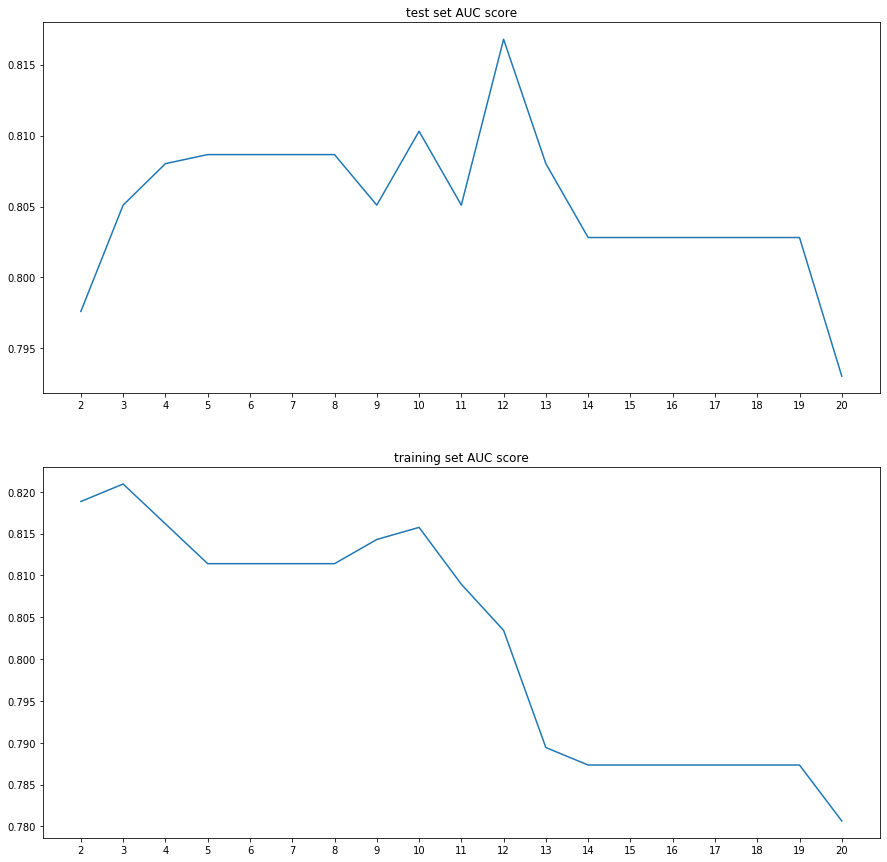

In [146]:
f, (p1, p2)= plt.subplots(2, 1, figsize=(15,15))

p1.plot(np.arange(START, END), scores)
p1.title.set_text('test set AUC score')
p1.set_xticks(np.arange(START, END), minor=False)

p2.plot(np.arange(START, END), train_scores)
p2.title.set_text('training set AUC score')
p2.set_xticks(np.arange(START, END), minor=False)


In [157]:
x_input_col = ['Pclass', 'Sex']
y_input_col = ['Survived']

X_f1 = data[x_input_col]
y_f1 = data[y_input_col]
print(X_f1)
print(y_f1)

     Pclass  Sex
0         3    1
1         1    0
2         3    0
3         1    0
4         3    1
..      ...  ...
882       2    1
883       1    0
884       3    0
885       1    1
886       3    1

[887 rows x 2 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
882         0
883         1
884         0
885         1
886         0

[887 rows x 1 columns]


In [188]:
CLASS =1
FEMALE = 1

total_s = 0
total_d = 0
total_ds = 0
total_dns = 0

total = data.shape[0]
for i in range(total):
    s = False
    if(y_f1['Survived'][i] == 1):
        total_s+=1
        s = True
    d = False
    if(X_f1['Pclass'][i] == CLASS and X_f1['Sex'][i] == FEMALE):
        total_d+=1
        d = True
    if(s and d):
        total_ds +=1
    if(not s and d):
        total_dns +=1
print(total_s)
print(total_d)
print(total_ds)
print(total_dns)
total_ns = total - total_s
p_s = total_s / total
p_ns = (total - total_s) / total
p_d = total_d / total
p_ds = total_ds/ total_s
p_dns = total_dns / total_ns
print(p_s)
print(p_d)
print(p_ds)
p_sd = p_ds * p_s / (p_ds * p_s + p_dns * p_ns)
print(p_ds * p_s)
print(p_dns * p_ns)
print(p_sd)

dtc = DecisionTreeClassifier(min_samples_leaf=op_min_leaf)
dtc.fit(X_f1, y_f1)
print(dtc.predict_proba([[1,1]]))

342
122
45
77
0.3855693348365276
0.1375422773393461
0.13157894736842105
0.050732807215332576
0.08680947012401352
0.36885245901639346
[[0.63114754 0.36885246]]
